🟠 PROBLEM STATEMENT: A hospital readmission basically happens when a patient who is discharged from the hospital, gets re-admitted within a certain period of time. So from the hospital readmission rates we can determine the considered  quality of hospital, treatment and the cost of the treatment. So the main objective for this problem is to predict whether a patient is likely to be readmitted to hospital based on the previous details of the patient.

🟢 The dataset contains 48 features and 66587 rows in train dataset and 16647 data in test dataset. The Column readmission is the target dataset.

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
# Loading the train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
# Train data shape
train_data.shape

(66587, 49)

In [ ]:
# Test data shape
test_data.shape

(16647, 48)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16647 entries, 0 to 16646
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16647 non-null  int64  
 1   encounter_id        16647 non-null  int64  
 2   patient_id          16647 non-null  int64  
 3   race                16647 non-null  object 
 4   gender              16647 non-null  object 
 5   age                 16647 non-null  object 
 6   weight              16647 non-null  object 
 7   time_in_hospital    16647 non-null  int64  
 8   medical_specialty   16647 non-null  object 
 9   num_lab_procedures  16647 non-null  int64  
 10  num_procedures      16647 non-null  int64  
 11  num_medications     16647 non-null  int64  
 12  number_outpatient   16647 non-null  int64  
 13  number_emergency    16647 non-null  int64  
 14  number_inpatient    16647 non-null  int64  
 15  diag_1              16647 non-null  object 
 16  diag

In [ ]:
train_data.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [ ]:
train_data.tail()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0
66586,51312,153167502,81985473,Caucasian,Female,[80-90),?,2,?,38,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [ ]:
# Relacing ? with NaN
train_data.replace('?', np.nan, inplace = True)

In [ ]:
train_data.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),NaN,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),NaN,5,NaN,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [ ]:
# Relacing ? with NaN
test_data.replace('?', np.nan, inplace = True)

In [ ]:
test_data.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),NaN,3,NaN,45,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),NaN,2,NaN,10,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),NaN,11,InternalMedicine,41,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),NaN,1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),NaN,7,InternalMedicine,59,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [ ]:
# Check the correlation among the columns

train_data.corr()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
index,1.000000,0.967746,0.530321,-0.069455,-0.024829,-0.018229,0.086206,0.123406,0.093911,0.038776,0.010872,0.280526,-0.020770
encounter_id,0.967746,1.000000,0.515897,-0.065718,-0.026513,-0.011833,0.079311,0.110434,0.083868,0.032505,0.010133,0.266711,-0.037686
patient_id,0.530321,0.515897,1.000000,-0.024560,0.008258,-0.010764,0.027329,0.107852,0.064268,0.010618,0.001094,0.228001,0.068800
time_in_hospital,-0.069455,-0.065718,-0.024560,1.000000,0.317791,0.189862,0.466018,-0.004403,-0.014538,0.074129,-0.001322,0.217898,0.053223
num_lab_procedures,-0.024829,-0.026513,0.008258,0.317791,1.000000,0.068696,0.269419,-0.004809,-0.006951,0.045833,-0.007252,0.152295,0.035691
num_procedures,-0.018229,-0.011833,-0.010764,0.189862,0.068696,1.000000,0.388733,-0.024343,-0.043824,-0.067695,0.011024,0.074671,-0.044342
num_medications,0.086206,0.079311,0.027329,0.466018,0.269419,0.388733,1.000000,0.051360,0.008086,0.065070,0.007218,0.262382,0.049729
number_outpatient,0.123406,0.110434,0.107852,-0.004403,-0.004809,-0.024343,0.051360,1.000000,0.090484,0.108023,-0.001494,0.095103,0.081590
number_emergency,0.093911,0.083868,0.064268,-0.014538,-0.006951,-0.043824,0.008086,0.090484,1.000000,0.284529,-0.000602,0.057698,0.107820
number_inpatient,0.038776,0.032505,0.010618,0.074129,0.045833,-0.067695,0.065070,0.108023,0.284529,1.000000,0.004172,0.109730,0.217446


In [ ]:
test_data.corr()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses
index,1.000000,0.967489,0.535217,-0.055473,-0.027086,-0.033707,0.089348,0.111527,0.103822,0.054839,0.005652,0.286863
encounter_id,0.967489,1.000000,0.519790,-0.053338,-0.030764,-0.027238,0.082206,0.097744,0.093610,0.046576,0.004329,0.271240
patient_id,0.535217,0.519790,1.000000,-0.016617,0.015584,-0.010424,0.031617,0.101067,0.080213,0.029273,0.004530,0.236691
time_in_hospital,-0.055473,-0.053338,-0.016617,1.000000,0.316287,0.172692,0.468098,0.000830,-0.000456,0.076844,-0.014081,0.216869
num_lab_procedures,-0.027086,-0.030764,0.015584,0.316287,1.000000,0.050340,0.261719,-0.006792,-0.000059,0.032014,-0.001864,0.153761
num_procedures,-0.033707,-0.027238,-0.010424,0.172692,0.050340,1.000000,0.373698,-0.015059,-0.052321,-0.075417,-0.003872,0.063219
num_medications,0.089348,0.082206,0.031617,0.468098,0.261719,0.373698,1.000000,0.054799,0.023694,0.065876,-0.014327,0.258296
number_outpatient,0.111527,0.097744,0.101067,0.000830,-0.006792,-0.015059,0.054799,1.000000,0.101912,0.111757,-0.006036,0.090176
number_emergency,0.103822,0.093610,0.080213,-0.000456,-0.000059,-0.052321,0.023694,0.101912,1.000000,0.298741,0.001841,0.064558
number_inpatient,0.054839,0.046576,0.029273,0.076844,0.032014,-0.075417,0.065876,0.111757,0.298741,1.000000,-0.000396,0.109242


In [ ]:
train_data.isnull().sum()

index                     0
encounter_id              0
patient_id                0
race                   1504
gender                    0
age                       0
weight                64454
time_in_hospital          0
medical_specialty     32672
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                   15
diag_2                  231
diag_3                  954
diag_4                  954
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [ ]:
train_data['race'] = train_data['race'].fillna('NaN')
train_data['weight'] = train_data['weight'].fillna('NaN')
train_data['medical_specialty'] = train_data['medical_specialty'].fillna('NaN')
train_data['diag_1'] = train_data['diag_1'].fillna('NaN')
train_data['diag_2'] = train_data['diag_2'].fillna('NaN')
train_data['diag_3'] = train_data['diag_3'].fillna('NaN')
train_data['diag_4'] = train_data['diag_4'].fillna('NaN')

In [ ]:
train_data.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [ ]:
test_data.isnull().sum()

index                     0
encounter_id              0
patient_id                0
race                    371
gender                    0
age                       0
weight                16107
time_in_hospital          0
medical_specialty      8081
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    3
diag_2                   63
diag_3                  247
diag_4                  247
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [ ]:
test_data['race'] = train_data['race'].fillna('NaN')
test_data['weight'] = train_data['weight'].fillna('NaN')
test_data['medical_specialty'] = train_data['medical_specialty'].fillna('NaN')
test_data['diag_1'] = train_data['diag_1'].fillna('NaN')
test_data['diag_2'] = train_data['diag_2'].fillna('NaN')
test_data['diag_3'] = train_data['diag_3'].fillna('NaN')
test_data['diag_4'] = train_data['diag_4'].fillna('NaN')

In [ ]:
test_data.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [ ]:
train_data['readmitted'].value_counts()

0    35823
1    30764
Name: readmitted, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

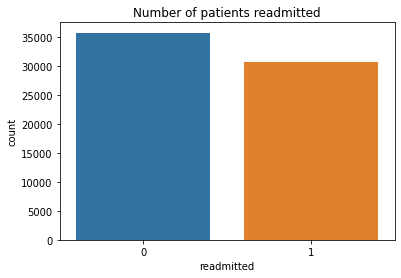

In [ ]:
# No. of readmission
sns.countplot(train_data['readmitted']).set_title('Number of patients readmitted')
plt.show

In [ ]:
train_data['time_in_hospital'].value_counts()

3     11684
2     11370
1      9132
4      9105
5      6554
6      5027
7      3758
8      2825
9      1899
10     1552
11     1237
12     1006
13      787
14      651
Name: time_in_hospital, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

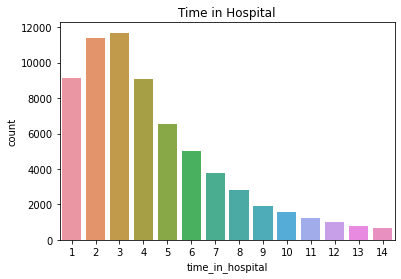

In [ ]:
# Time spent in Hospital
sns.countplot(train_data['time_in_hospital']).set_title('Time in Hospital')
plt.show

Text(0.5, 1.0, 'Time Spent vs Readmitted')

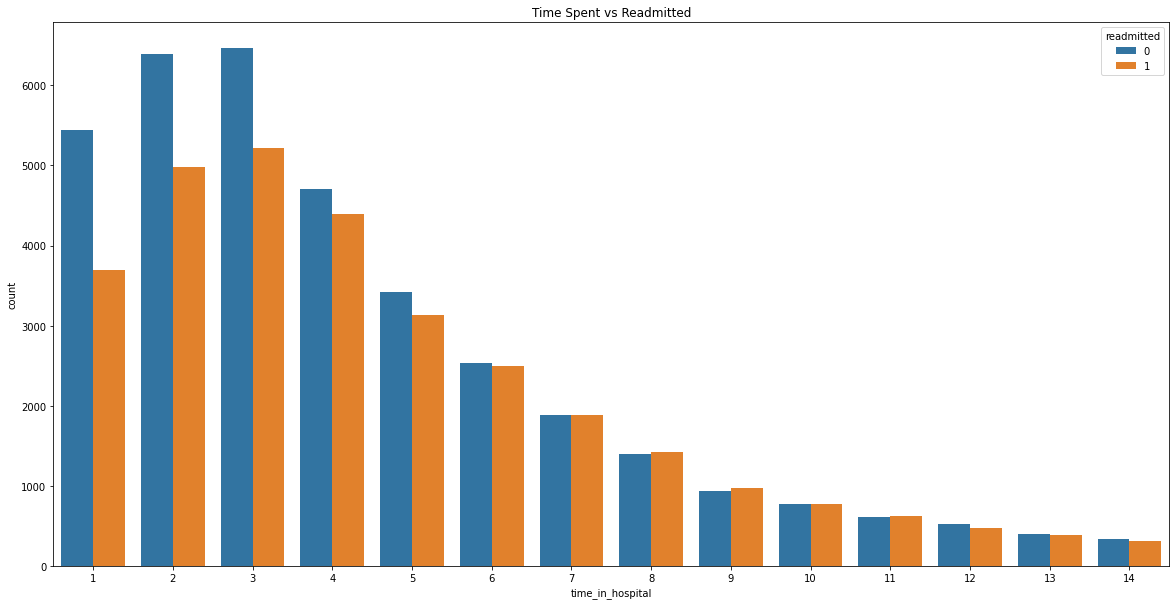

In [ ]:
# Time vs Readmitted

fig_1 = plt.figure(figsize = (20, 10))
sns.countplot(x = train_data['time_in_hospital'], hue = train_data['readmitted']).set_title('Time Spent vs Readmitted')

In [ ]:
train_data['age'].value_counts()

[70-80)     17031
[60-70)     14845
[50-60)     11378
[80-90)     11080
[40-50)      6324
[30-40)      2414
[90-100)     1833
[20-30)      1154
[10-20)       428
[0-10)        100
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

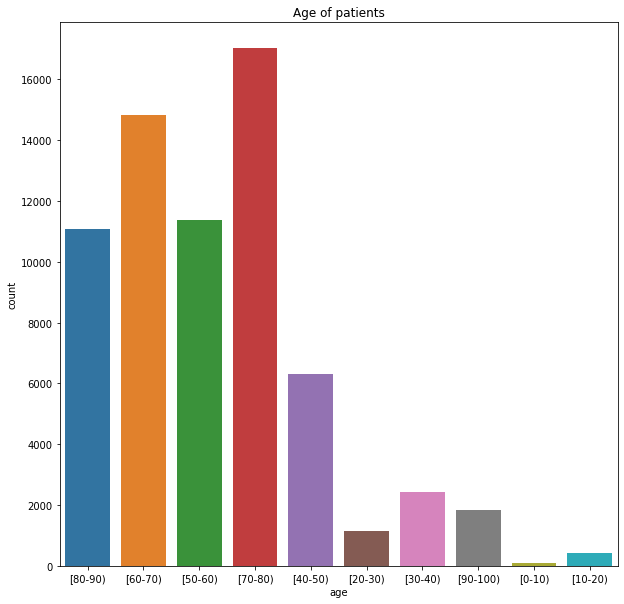

In [ ]:
# Age of patients
fig_age = plt.figure(figsize = (10, 10))
sns.countplot(train_data['age']).set_title('Age of patients')
plt.show

Text(0.5, 1.0, 'Age vs Readmitted')

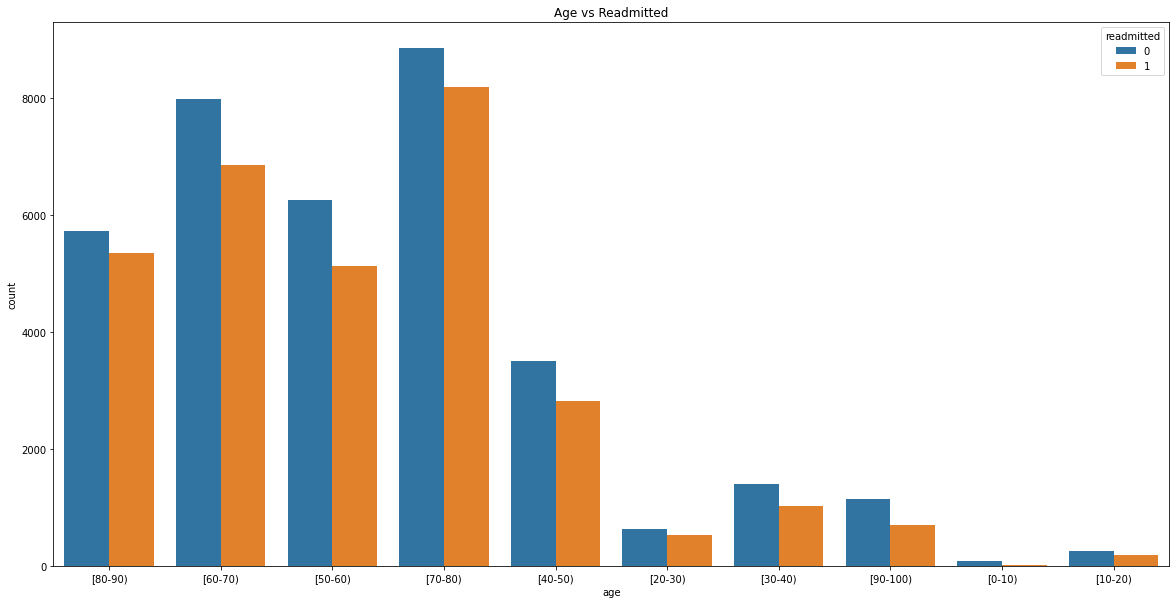

In [ ]:
# Age vs Readmitted

fig_2 = plt.figure(figsize = (20, 10))
sns.countplot(x = train_data['age'], hue = train_data['readmitted']).set_title('Age vs Readmitted')

In [ ]:
train_data['gender'].value_counts()

Female             35973
Male               30612
Unknown/Invalid        2
Name: gender, dtype: int64

Text(0.5, 1.0, 'Age vs Readmitted')

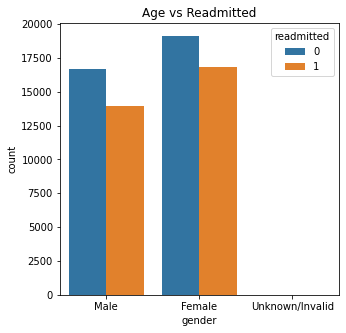

In [ ]:
# Gender vs Readmitted

fig_3 = plt.figure(figsize = (5, 5))
sns.countplot(x = train_data['gender'], hue = train_data['readmitted']).set_title('Age vs Readmitted')

In [ ]:
train_data['race'].value_counts()

Caucasian          49906
AfricanAmerican    12406
NaN                 1504
Hispanic            1313
Other               1050
Asian                408
Name: race, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

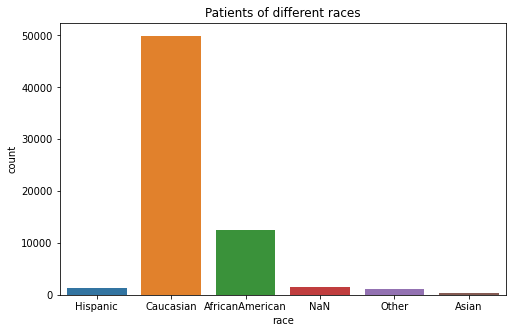

In [ ]:
# Race 

fig_race = plt.figure(figsize = (8, 5))
sns.countplot(train_data['race']).set_title('Patients of different races')
plt.show

Text(0.5, 1.0, 'Race vs Readmitted')

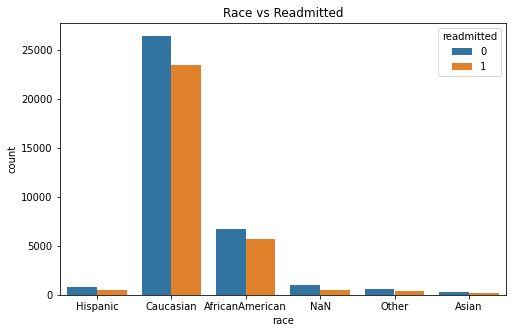

In [ ]:
# Race vs Readmitted

fig_3 = plt.figure(figsize = (8, 5))
sns.countplot(x = train_data['race'], hue = train_data['readmitted']).set_title('Race vs Readmitted')

In [ ]:
# Number of lab procedures
train_data['num_lab_procedures'].value_counts()

1      2005
43     1861
45     1597
44     1592
46     1446
       ... 
129       1
113       1
120       1
118       1
104       1
Name: num_lab_procedures, Length: 113, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

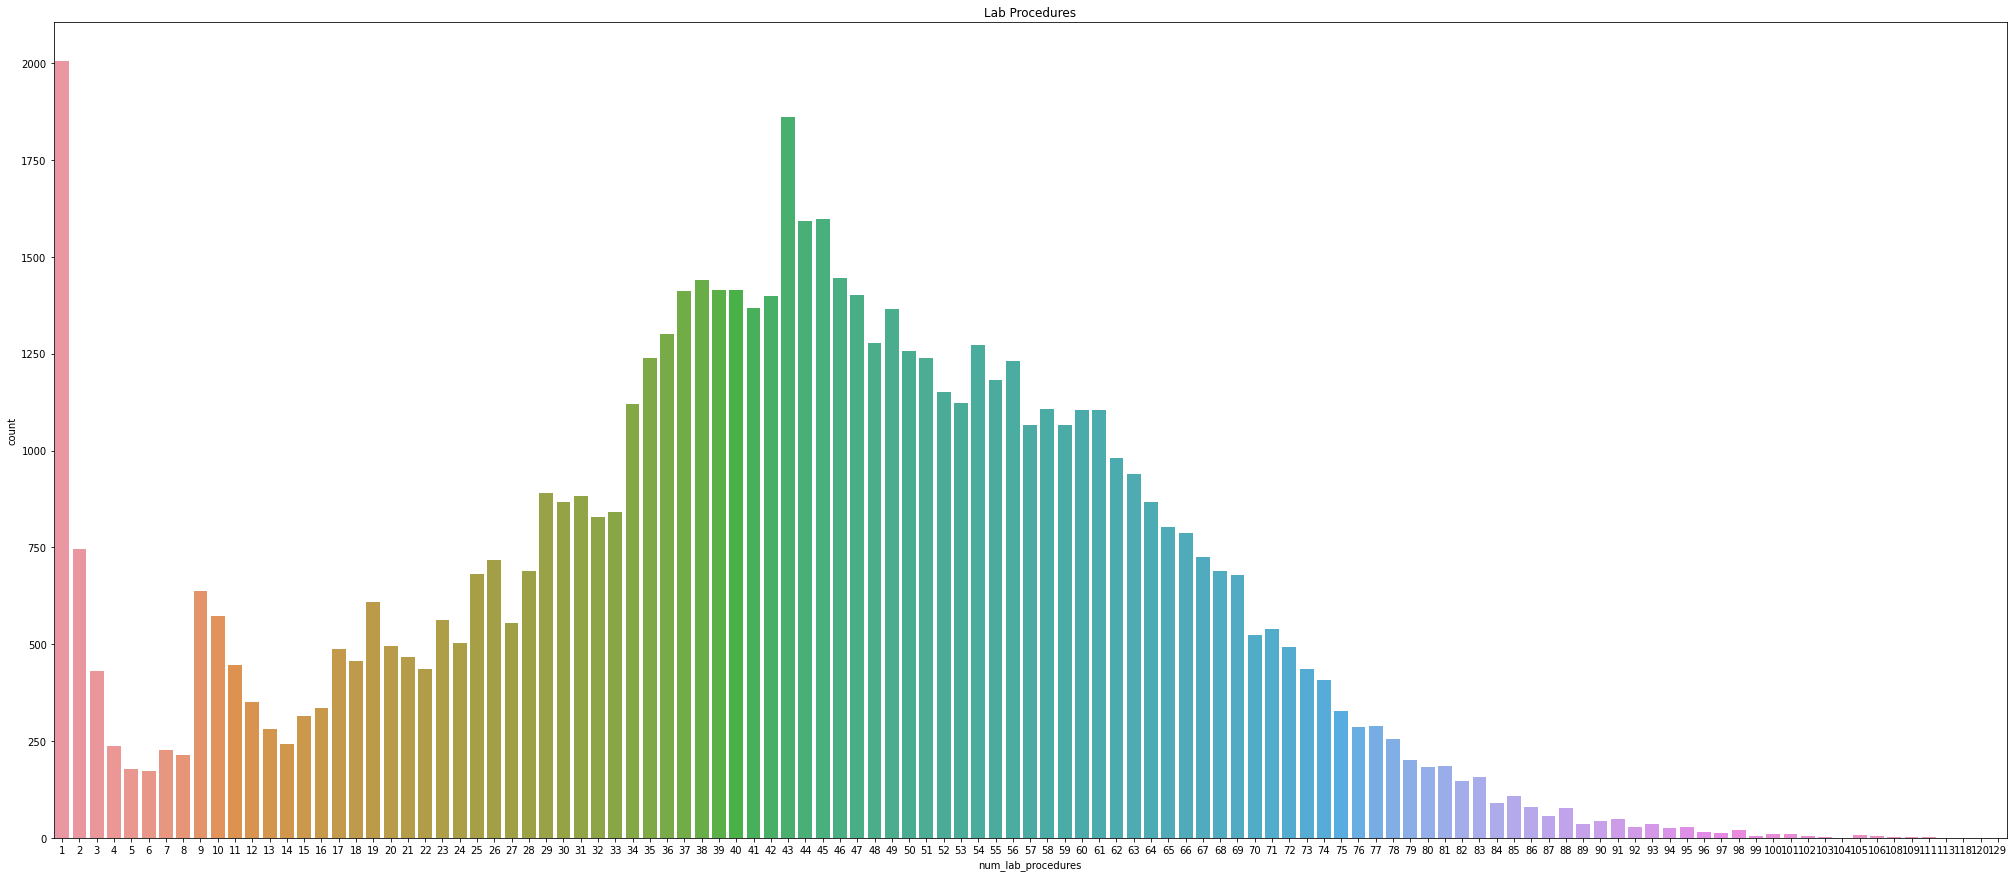

In [ ]:
fig_lab = plt.figure(figsize = (35, 15))
sns.countplot(train_data['num_lab_procedures']).set_title('Lab Procedures')
plt.show

Text(0.5, 1.0, ' Readmission vs Number of lab procedure')

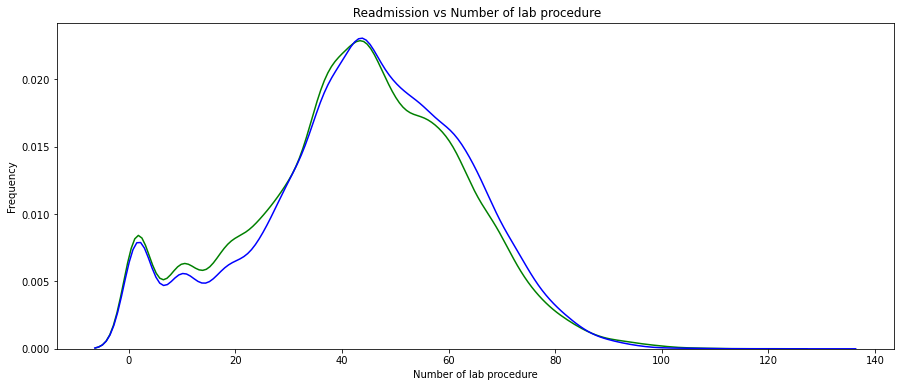

In [ ]:
# Readmission vs Num of Lab Procedures 
fig = plt.figure(figsize=(15,6),)
axis=sns.kdeplot(train_data.loc[(train_data['readmitted'] == 0),'num_lab_procedures'] , color='g',shade = False,label = 'Not readmitted')
axis=sns.kdeplot(train_data.loc[(train_data['readmitted'] == 1),'num_lab_procedures'] , color='b',shade = False, label = 'readmitted')
axis.set(xlabel = 'Number of lab procedure', ylabel = 'Frequency')
plt.title(' Readmission vs Number of lab procedure')

In [ ]:
#Checking for singular data values from X1-X10
train_data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']].value_counts()

X1    X2    X3      X4      X5      X6      X7      X8  X9      X10   
None  None  No      No      No      No      No      No  No      No        31253
            Steady  No      No      No      No      No  No      No         5214
            No      No      No      No      No      No  Steady  No         4147
                                                        No      Steady     2966
      >8    No      No      No      No      No      No  No      No         2879
                                                                          ...  
>300  >8    No      Steady  No      No      No      No  Down    No            1
None  None  Up      No      No      No      Steady  No  Down    No            1
            Down    No      No      Steady  No      No  No      No            1
                            Steady  No      No      No  No      No            1
      >8    Up      No      No      No      No      No  Steady  Steady        1
Length: 423, dtype: int64

In [ ]:
#Checking for singular data values from X11-X20
train_data[['X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20']].value_counts()

X11     X12     X13  X14     X15     X16  X17     X18  X19  X20   
No      No      No   No      No      No   No      No   No   No        26930
                                                            Steady    17105
                                                            Down       6938
                                                            Up         6454
        Steady  No   No      No      No   No      No   No   No         2131
                                                                      ...  
                                          Steady  No   No   No            1
                                                            Steady        1
                     Steady  No      No   No      No   No   Down          1
                     No      Steady  No   No      No   No   Up            1
Steady  No      No   No      No      No   No      No   No   Up            1
Length: 75, dtype: int64

In [ ]:
#Checking for singular data values from X21-X25
train_data[['X21', 'X22', 'X23', 'X24', 'X25']].value_counts()

X21     X22     X23     X24     X25
No      No      No      No      No     66093
Steady  No      No      No      No       466
No      Steady  No      No      No        11
Down    No      No      No      No         5
No      No      No      Steady  No         5
Up      No      No      No      No         5
No      No      Steady  No      No         1
Steady  Steady  No      No      No         1
dtype: int64

In [ ]:
# Found singular value in the following
train_data[['X8', 'X18', 'X19', 'X25']].value_counts()

X8  X18  X19  X25
No  No   No   No     66587
dtype: int64

In [ ]:
# Dropping Columns : X8,X18,X19,X25 (It has single values in the Data frame
train_data.drop(['index','weight','medical_specialty','X8','X18','X19','X25','diag_1','diag_2','diag_3','diag_4','diag_5'],axis=1,inplace=True)
test_data.drop(['index','weight','medical_specialty','X8','X18','X19','X25','diag_1','diag_2','diag_3','diag_4','diag_5'],axis=1,inplace=True)

In [ ]:
train_data.shape,test_data.shape

((66587, 37), (16647, 36))

In [ ]:
# Converting the value form int to category
train_data['readmitted'] = train_data.readmitted.astype('category')

In [ ]:
column_encoding = ['encounter_id','patient_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses','race','gender','age','X1','X2','X3','X4','X5','X6','X7','X9','X10','X11','X12','X13','X14','X15','X16','X17',
             'X20','X21','X22','X23','X24','change','diabetesMed']
for i in column_encoding:
    train_data[i] = LabelEncoder().fit_transform(train_data[i])
    test_data[i] = LabelEncoder().fit_transform(test_data[i])

In [ ]:
train_data.shape,test_data.shape

((66587, 37), (16647, 36))

In [ ]:
X = train_data.drop(['readmitted'],axis=1)
y = train_data['readmitted']

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
# Decision tree classification model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(dt_pred,name='Predict'),margins=True)
print("Accuracy = {0:.2f}".format(accuracy_score(y_test, dt_pred)))
print("Precision = {0:.2f}".format(precision_score(y_test, dt_pred)))
print("Recall = {0:.2f}".format(recall_score(y_test, dt_pred)))
print("F1 Score  = {0:.2f}".format(f1_score(y_test,dt_pred)))

Accuracy = 0.75
Precision = 0.72
Recall = 0.74
F1 Score  = 0.73


In [ ]:
prediction = dt.predict(test_data)

In [ ]:
prediction

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
df5 = pd.DataFrame(prediction)

In [ ]:
df5.to_csv('file3.csv')